<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Trabalho_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
from urllib.request import urlretrieve
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


Dados de MP$_{10}$ da cidade Metrópolis são disponibilizados no link: https://www.dropbox.com/s/9a5syi3i5h2dgit/serie-junho-Cidade_Metropolis-pm10.csv?dl=1 


**Exercício 1)** Importar os dados de material particulado MP$_{10}$ e fazer um gráfico dos dados com médias horárias para o mês de junho.

In [2]:
URL = 'https://www.dropbox.com/s/9a5syi3i5h2dgit/serie-junho-Cidade_Metropolis-pm10.csv?dl=1' # Importar os dados
urlretrieve(URL, 'serie-junho-Cidade_Metropolis-pm10.csv') 

('serie-junho-Cidade_Metropolis-pm10.csv',
 <http.client.HTTPMessage at 0x7f826fbf4b10>)

In [3]:
!head 'serie-junho-Cidade_Metropolis-pm10.csv'

ano-mes-dia horario,concentracaoCMETROPOLIS
2020-06-01 00:00:00,36.599999999999994
2020-06-01 00:01:00,33.333333333333336
2020-06-01 00:02:00,38.141666666666666
2020-06-01 00:03:00,43.0
2020-06-01 00:04:00,45.458333333333336
2020-06-01 00:05:00,35.99166666666667
2020-06-01 00:06:00,41.25833333333333
2020-06-01 00:07:00,42.108333333333334
2020-06-01 00:08:00,39.85833333333334


                     concentracaoCMETROPOLIS
data                                        
2020-06-01 00:00:00                45.507767
2020-06-01 01:00:00                38.921250
2020-06-01 02:00:00                33.040032
2020-06-01 03:00:00                28.670278
2020-06-01 04:00:00                26.315662
...                                      ...
2020-06-30 19:00:00                 4.248803
2020-06-30 20:00:00                 4.337682
2020-06-30 21:00:00                 5.356944
2020-06-30 22:00:00                 6.593739
2020-06-30 23:00:00                 7.524733

[720 rows x 1 columns]


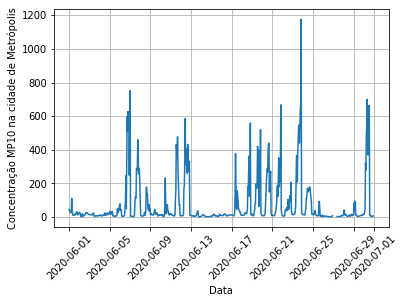

In [4]:
dados_mp10 = pd.read_csv('serie-junho-Cidade_Metropolis-pm10.csv', sep = ',') # Converter dados para um dataframe

data_mp10 = []
datestring = dados_mp10['ano-mes-dia horario']
for i in range (len(dados_mp10)):
  data_mp10.append(datetime.strptime(datestring[i], "%Y-%m-%d %H:%M:%S"))


dados_mp10['data'] = data_mp10
dados_mp10 = dados_mp10.set_index('data')
del dados_mp10['ano-mes-dia horario']

dados_mp10_horario = dados_mp10.resample('H').mean()
print(dados_mp10_horario)

plt.plot(dados_mp10_horario.index, dados_mp10_horario['concentracaoCMETROPOLIS'])
plt.xlabel('Data')
plt.xticks(rotation = 45)
plt.ylabel('Concentração MP10 na cidade de Metrópolis')
plt.grid()



**Exercício 2)** Fazer um gráfico dos dados com médias diárias de MP$_{10}$ para o mês de junho e incluir uma linha horizontal indicando os limites da Resolução CONAMA Nº 491.

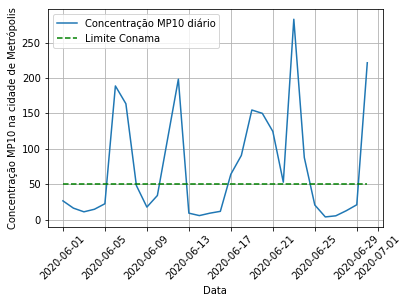

In [5]:
dados_mp10_diario = dados_mp10.resample('d').mean()
limite_conama = np.zeros(len(dados_mp10_diario['concentracaoCMETROPOLIS']))
for i in range (len(dados_mp10_diario)):
  limite_conama[i] = 50

plt.plot(dados_mp10_diario.index, dados_mp10_diario['concentracaoCMETROPOLIS'], label = 'Concentração MP10 diário')
plt.plot(dados_mp10_diario.index, limite_conama, 'green', linestyle = '--', label = 'Limite Conama')
plt.xlabel('Data')
plt.xticks(rotation = 45)
plt.ylabel('Concentração MP10 na cidade de Metrópolis')
plt.grid()
plt.legend(loc = 'best')


**Exercício 3)** Calcular o Índice de Qualidade do Ar (IQAr) diário usando concentrações de MP$_{10}$ e fazer um gráfico do IQAr diário para o mês de junho.

26.605499708624706 21.284399766899767
16.335369925213676 13.068295940170941
11.146766381766382 8.917413105413106
14.74660568019943 11.797284544159545
22.534120855995855 18.027296684796685
188.72205796265592 181.81719549081262
163.6258475783476 141.3559583406012
48.234589889277395 38.79895929962895
17.81738660644911 14.253909285159288
34.155560452279204 27.324448361823364
116.15466849726361 93.06187900802614
198.2665251068376 197.20521394775858
9.252313155594406 7.401850524475525
5.822290331196582 4.657832264957266
9.220792055167056 7.376633644133645
11.81361633158508 9.450893065268065
64.13553677803678 51.4548149866007
90.68104842495468 72.7869569096578
154.77014196451697 127.0783921468743
150.07071698556072 119.50176820121014
124.56200733294483 78.37548121025799
52.971727005633255 42.56933373917749
282.82158649799277 282.82158649799277
87.68682793479668 70.4038018256545
20.75727062289562 16.605816498316496
3.942199759732703 3.1537598077861624
5.503136555131236 4.402509244104989
12.719

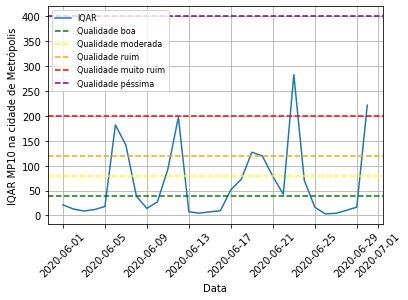

In [6]:
# iqar = indice(inicial) + (indice(final)-indice(inicial))/(conc(final)-conc(inicial)) * (conc(medida) - conc(inicial))

def iqar_mp10(concentracao_medida):


  N1 = pd.Series([0, 40, 0, 50], index = ['Indice inicial', 'Indice final', 'Concentração inicial', 'Concentração final'])
  N2 = pd.Series([41, 80, 51, 100], index = ['Indice inicial', 'Indice final', 'Concentração inicial', 'Concentração final'])
  N3 = pd.Series([81, 120, 101, 150], index = ['Indice inicial', 'Indice final',  'Concentração inicial', 'Concentração final'])
  N4 = pd.Series([121, 200, 151, 200], index = ['Indice inicial', 'Indice final', 'Concentração inicial', 'Concentração final'])
  N5 = pd.Series([201, 400, 201, 400], index = ['Indice inicial', 'Indice final', 'Concentração inicial', 'Concentração final'])

  # concentracao_medida = float(input("Insira a concentração medida: ")
  if 0 < concentracao_medida <= 40:
    iqar_calculo = N1['Indice inicial'] + (N1['Indice final']-N1['Indice inicial'])/(N1['Concentração final']-N1['Concentração inicial']) * (concentracao_medida - N1['Concentração inicial'])
    pass
  elif 41 < concentracao_medida <= 80:
    iqar_calculo = N2['Indice inicial'] + (N2['Indice final']-N2['Indice inicial'])/(N2['Concentração final']-N2['Concentração inicial']) * (concentracao_medida - N2['Concentração inicial'])
    pass
  elif 81 < concentracao_medida <= 120:
    iqar_calculo = N3['Indice inicial'] + (N3['Indice final']-N3['Indice inicial'])/(N3['Concentração final']-N3['Concentração inicial']) * (concentracao_medida - N3['Concentração inicial'])
    pass
  elif 121 < concentracao_medida <= 200:
    iqar_calculo = N4['Indice inicial'] + (N4['Indice final']-N4['Indice inicial'])/(N4['Concentração final']-N4['Concentração inicial']) * (concentracao_medida - N4['Concentração inicial'])
    pass
  elif 201 < concentracao_medida <= 400:
    iqar_calculo = N5['Indice inicial'] + (N5['Indice final']-N5['Indice inicial'])/(N5['Concentração final']-N5['Concentração inicial']) * (concentracao_medida - N5['Concentração inicial'])
    pass
  else:
    print('Valor inserido não adeqado')

  return iqar_calculo

# iqar_mp10()

iqar = []
for i in range(len(dados_mp10_diario)):
    iqar.append(iqar_mp10(dados_mp10_diario['concentracaoCMETROPOLIS'][i]))
    print(dados_mp10_diario['concentracaoCMETROPOLIS'][i], iqar[i])
  
plt.plot(dados_mp10_diario.index, iqar, label = 'IQAR')
plt.xlabel('Data')
plt.xticks(rotation = 45)
plt.ylabel('IQAR MP10 na cidade de Metrópolis')
plt.axhline(y=40, color='green', linestyle='--', label = 'Qualidade boa')
plt.axhline(y=80, color='yellow', linestyle='--', label = 'Qualidade moderada')
plt.axhline(y=120, color='orange', linestyle='--', label = 'Qualidade ruim')
plt.axhline(y=200, color='red', linestyle='--', label = 'Qualidade muito ruim')
plt.axhline(y=400, color='purple', linestyle='--', label = 'Qualidade péssima')
plt.grid()
plt.legend(loc = 'best', fontsize = 8)


**Exercício 4)** Escrever um parágrado para avaliar a qualidade do ar da cidade Metrópolis.

In [7]:
def qualidade (iqar_cidade):
    
  dia_bom = 0
  dia_moderado = 0
  dia_ruim = 0
  dia_muito_ruim = 0
  dia_pessimo = 0

  for i in range (len(iqar_cidade)):
      if 0 < iqar_cidade[i] <= 40:
        dia_bom += 1
        pass
      elif 41 < iqar_cidade[i] <= 80:
        dia_moderado +=1
        pass
      elif 81 < iqar_cidade[i] <= 120:
        dia_ruim += 1
        pass
      elif 121 < iqar_cidade[i] <= 200:
        dia_muito_ruim += 1
        pass
      elif 201 < iqar_cidade[i] <= 400:
        dia_pessimo += 1
        
  return print(f'A cidade analisada teve durante o período em questão: {dia_bom} dias bons, {dia_moderado} dias moderados, {dia_ruim} dias ruins, {dia_muito_ruim} dias muito ruins e {dia_pessimo} dias péssimos')

qualidade(iqar)

A cidade analisada teve durante o período em questão: 17 dias bons, 5 dias moderados, 2 dias ruins, 4 dias muito ruins e 2 dias péssimos


**Exercício 5)** Para esse exercício deve-se usar o arquivo trabalhado em sala (Estação INMET - Curitiba):
'https://www.dropbox.com/s/v6aevc8mp4lr3x8/dados_A807_H_2019-12-01_2020-08-01_OK.csv?dl=1'

Escreva uma função Python que calcule a porcentagem de valores ausentes para uma determinada série de dados. Use a função para calcular a porcentagem de valores ausentes para os conjuntos de dados temperatura e umidade.

Para a série original, antes de limpar, lembre-se de que você pode acessar os valores com series.values

Calcule a quantidade de dados faltantes para a) Umidade e b) Temperatura do ar (Bulbo seco)

In [8]:
URL = 'https://www.dropbox.com/s/v6aevc8mp4lr3x8/dados_A807_H_2019-12-01_2020-08-01_OK.csv?dl=1'
urlretrieve(URL, 'dados_A807_H_2019-12-01_2020-08-01_OK.csv') 

('dados_A807_H_2019-12-01_2020-08-01_OK.csv',
 <http.client.HTTPMessage at 0x7f826ba6fe90>)

In [9]:
estacao_cwb = pd.read_csv('dados_A807_H_2019-12-01_2020-08-01_OK.csv',
                            sep=';', skiprows=10)
estacao_cwb.columns


Index(['Data Medicao', 'Hora Medicao', 'PRECIPITACAO TOTAL. HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR. AUT(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'RADIACAO GLOBAL(W/m²)', 'TEMPERATURA DA CPU DA ESTACAO(°C)',
       'TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
       'TENSAO DA BATERIA DA ESTACAO(V)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)',
       'UMIDADE RELATIVA DO AR. HORARIA(%)',
       'VENTO. DIRECAO HORARIA (gr)(° (gr))', 'VENTO. RAJADA MAXIMA(m/s)',
       'VENTO. VELOCIDADE HORARIA(m/

In [22]:
# Calcular dados faltantes de umidade e temp ar (bulbo seco)

data_estacao = []
datestring = estacao_cwb['Data Medicao'] 
for i in range(len(estacao_cwb)):
  data_estacao.append(datetime.strptime(datestring[i], "%Y-%m-%d"))

def porcentagem ():
    
  estacao_cwb['data'] = data_estacao
  estacao_cwb.set_index('data')

  null_umidade = 0
  null_temperatura = 0

  for i in range(len(estacao_cwb['TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)'])):
    if pd.isnull(estacao_cwb['TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)'].values[i]) == True:
      null_temperatura +=1
  
  for i in range(len(estacao_cwb['UMIDADE RELATIVA DO AR. HORARIA(%)'])):
     if pd.isnull(estacao_cwb['UMIDADE RELATIVA DO AR. HORARIA(%)'].values[i]) == True:
       null_umidade +=1
  
  porcentagem_temp = (null_temperatura * 100)/len(estacao_cwb['TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)'])
  porcentagem_umidade = (null_umidade *100 )/len(estacao_cwb['UMIDADE RELATIVA DO AR. HORARIA(%)'])

  # print(null_temperatura, null_umidade)

  return print(f'A porcentagem de dados faltantes para a temperatura do ar (bulbo seco) e umidade relativa são {porcentagem_temp}% e {porcentagem_umidade}%, respectivamente.')


porcentagem()

A porcentagem de dados faltantes para a temperatura do ar (bulbo seco) e umidade relativa são 2.3639455782312924% e 33.12925170068027%, respectivamente.
